In [26]:
import matplotlib.pyplot as plt

import matcher
import pickle
import scipy
import numpy as np
import pandas as pd

In [27]:
with open('performance.pkl', 'rb') as f:
    qdb = pickle.load(f)

(18, 18) 2.0 4.0
(19, 19) 1.0 1.0
(20, 20) 1.0 1.0
(21, 21) 1.0 1.0
(22, 22) 2.0 4.0
(29, 29) 1.0 1.0
(35, 35) 1.0 1.0
(36, 36) 1.0 1.0
(37, 37) 2.0 4.0
(39, 39) 1.0 1.0
(40, 40) 1.0 1.0
(41, 41) 2.0 4.0
(47, 47) 1.0 1.0
(48, 48) 2.0 4.0
(49, 49) 2.0 4.0
(59, 59) 2.0 4.0
(69, 69) 3.0 7.0
(70, 70) 3.0 7.0
(80, 80) 2.0 4.0
(81, 81) 2.0 4.0
(82, 82) 2.0 4.0
(83, 83) 1.0 1.0
(89, 89) 1.0 1.0
(93, 93) 2.0 4.0
(94, 94) 1.0 1.0
(102, 102) 2.0 4.0
(103, 103) 2.0 4.0
(104, 104) 1.0 1.0
(108, 108) 1.0 1.0
(109, 109) 1.0 1.0
(110, 110) 2.0 4.0
(111, 111) 2.0 4.0
(137, 137) 2.0 4.0
(138, 138) 1.0 1.0
(139, 139) 2.0 4.0
(140, 140) 2.0 4.0
(141, 141) 2.0 4.0
(142, 142) 2.0 4.0
(143, 143) 2.0 4.0
(144, 144) 2.0 4.0
(145, 145) 1.0 1.0
(148, 148) 2.0 4.0
(155, 155) 1.0 1.0
(156, 156) 2.0 4.0
(157, 157) 2.0 4.0
(158, 158) 2.0 4.0
(159, 159) 2.0 4.0
(160, 160) 2.0 4.0
(174, 174) 2.0 4.0
(175, 175) 2.0 4.0
(186, 186) 2.0 4.0
(187, 187) 2.0 4.0
(188, 188) 2.0 4.0
(189, 189) 1.0 1.0
(190, 190) 3.0 7.0
(193,

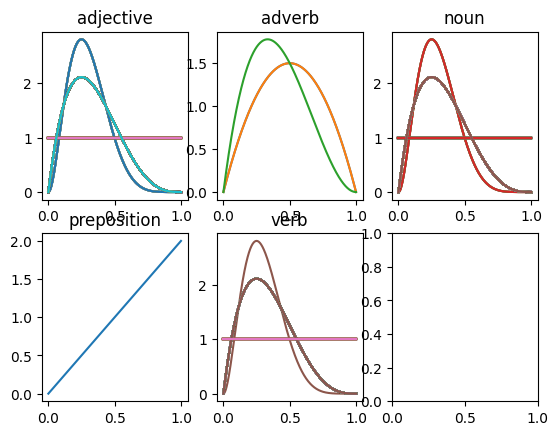

In [29]:
samplers = qdb.samplers
groups = list(sorted(samplers.keys()))

fig, axs = plt.subplots(len(groups) // 3 + (0 if len(groups) % 3 == 0 else 1), 3)
for group_index, group in enumerate(groups):
    row_index = group_index // 3
    col_index = group_index % 3
    ax = axs[row_index][col_index]
    ax.set_title(group)

    sampler = samplers[group]

    matches_index = sampler.matches.index
    self_matches = sampler.matches[
            matches_index.get_level_values('context')
            == matches_index.get_level_values('action')]
    x_axis = np.linspace(0, 1, 500)
    for context_id, beta in self_matches.iterrows():
        betas = scipy.stats.beta.pdf(x_axis, beta['match'], beta['mismatch'])
        print(context_id, beta['match'], beta['mismatch'])
        ax.plot(x_axis, betas)
